# **Cross Validation**
> In machine learning, we couldn’t fit the model on the training data and can’t say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique. In this article, we’ll delve into the process of cross-validation in machine learning.

#### **What is Cross-Validation?**
>Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance. 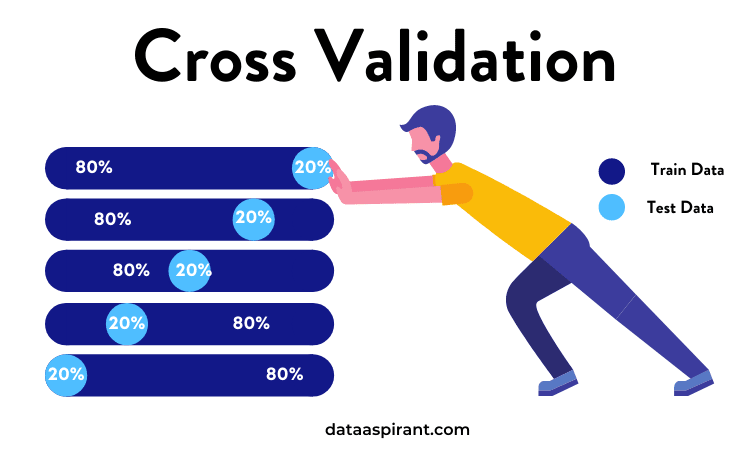

## we have 2 options:
# Stratified Kfold
# Kfold cross validation

In [ ]:
input Data: [0,1,2,3,4,5,6,7]
output Data:[0,0,0,0,1,1,1,1]
---------------------------------------
Apply StratifiedKFold done
# it return index as an output
# folds= 4 fold means 8/3 = 2 records everytime in test
#Stratified Kfold balance outputs
# It depends on both input + output
Train: [1 2 3 5 6 7] | test: [0 4]==> 0,1
Train: [0 2 3 4 6 7] | test: [1 5]
Train: [0 1 3 4 5 7] | test: [2 6]
Train: [0 1 2 4 5 6] | test: [3 7]


Apply KFold: done
# Kfold focus on Inputs
# Kfold doesnt focus on balancing of outputs
Train: [2 3 4 5 6 7] | test: [0 1]
Train: [0 1 4 5 6 7] | test: [2 3]
Train: [0 1 2 3 6 7] | test: [4 5]
Train: [0 1 2 3 4 5] | test: [6 7]

https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn

In [ ]:
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold
#from sklearn.model_selection import StratifiedKFold

In [ ]:
x = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y_n = np.array([0,0,0,0,1,1,1,1])

In [ ]:
8/5 #test will hold 2

In [ ]:
kf_3 = KFold(n_splits=5)

In [ ]:
y_n

In [ ]:
list(kf_3.split(x)) # return an array of index for training and test samples

In [ ]:
kf = KFold(n_splits=4)
# default  n_split=5

In [ ]:
8/4

In [ ]:
#Generate indices to split data into training and test set.
list(kf.split(x))

In [ ]:
x.shape

In [ ]:
kf

In [ ]:
for index in kf.split(x):
    print(index)

In [ ]:
for train_index,test_index in kf.split(x):
    print('train:',train_index,'test:',test_index)

In [ ]:
for train_index,test_index in kf.split(x):
    print('X_train:',x[train_index],'y_train:',y_n[train_index],'X_test:',x[test_index],'y_test:',y_n[test_index],sep='\n')
    print('-----------------------------')
    # X_train,y_train,x_test,y_test

In [ ]:
"""
Kfold split gives index
index se hum data banate hai
train index+ test_index
X[train_index]==> X_train
X[test_index]==> X_test
y[train_index]==> y_train
y[test_index]==> y_test
"""

# Using Stratified

In [ ]:
skf = StratifiedKFold(n_splits=4)
skf

In [ ]:
skf.split(x,y_n)

In [ ]:
list(skf.split(x,y_n))
#[array(training_index),array(test_index)]

In [ ]:
y_n

In [ ]:
for train_index,test_index in skf.split(x,y_n):
    print('X_train:',x[train_index],'y_train:',y_n[train_index],'X_test:',x[test_index],'y_test:',y_n[test_index],sep='\n')
    print('-----------------------------')

In [ ]:
# If we have imbalanaced Data
x_1 = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y_1 = np.array([0,0,0,1,1,1,1,1])

In [ ]:
# test records =  total number of rows/number of splits

In [ ]:
skf_1 = StratifiedKFold(n_splits=2)
list(skf_1.split(x_1,y_1))

In [ ]:
skf_1

In [ ]:
for train_index,test_index in skf_1.split(x_1,y_1):
    print(train_index,test_index)

In [ ]:
y_1

In [ ]:
for train_index,test_index in skf_1.split(x_1,y_1):
    print('X_train:',x_1[train_index],'y_train:',y_1[train_index],'X_test:',x_1[test_index],'y_test:',y_1[test_index],sep='\n')
    print('-----------------------------')

## Apply Kfold on Bank note classification data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hakimyameen/DS_ML_Work/main/banknotes.csv')
df[:2]

In [ ]:
inp = df.iloc[:,:-1]
out = df['Class']

In [ ]:
skf

In [ ]:
inp[:2]

In [ ]:
inp = inp.values
inp

In [ ]:
out[:3]

In [ ]:
len(inp)

In [ ]:
1372/4

In [ ]:
y.value_counts()

In [ ]:
for train_index,test_index in skf.split(inp,out):
    #print(len(inp[train_index]),len(out[test_index]))
    print(inp[train_index],inp[test_index],out[train_index],out[test_index])
          # X_train,X_test,y_train,y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
avg = []
for train_index,test_index in skf.split(inp,out):
    X_train,y_train = inp[train_index],out[train_index]
    X_test,y_test = inp[test_index],out[test_index]
    model.fit(X_train,y_train)
    #print(model.score(X_train,y_train)*100,model.score(X_test,y_test)*100)
    y_pred = model.predict(X_test)
    #print(accuracy_score(y_test,y_pred))
    avg.append(accuracy_score(y_test,y_pred))
print('Average Accuracy is:',np.mean(avg)*100)

In [ ]:
# SIMPLEST OPTION IS TO USE
from sklearn.model_selection import cross_val_score
cross_val_score(model,inp,out,cv=4).mean()*100